<a href="https://colab.research.google.com/github/SamiraAsadzadeh/HomeWork_DeepLearning/blob/GoogleColab/Autoencoders_CAE_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **By: Samira Asadzadeh  40116341054541**

*   **Advisor:  Dr. Mr.Asadi**

*  **ISLAMIC AZAD UNIVERSITY SHIRAZ BRANCH Faculty of engineering**



# **autoencoder for image denoising**

#Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import *
from skimage.io import imread, imshow, imsave

from IPython.display import Image


#Normalizes the supplied array and reshapes it into the appropriate format.
آرایه ارائه شده را نرمال می کند و آن را به فرمت مناسب تغییر شکل می دهد

In [ ]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


#NAdds random noise to each image in the supplied array
نویز تصادفی را به هر تصویر در آرایه ارائه شده اضافه می کند

In [ ]:
def apply_gaussian_noise(X, sigma=0.2):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

#Displays ten random images from each one of the supplied arrays
ده تصویر تصادفی را از هر یک از آرایه های ارائه شده نمایش می دهد

In [ ]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Prepare the data
#Since we only need images from the dataset to encode and decode, we won't use the labels.
از آنجایی که ما فقط به تصاویر از مجموعه داده برای رمزگذاری و رمزگشایی نیاز داریم، از برچسب ها استفاده نخواهیم کرد.

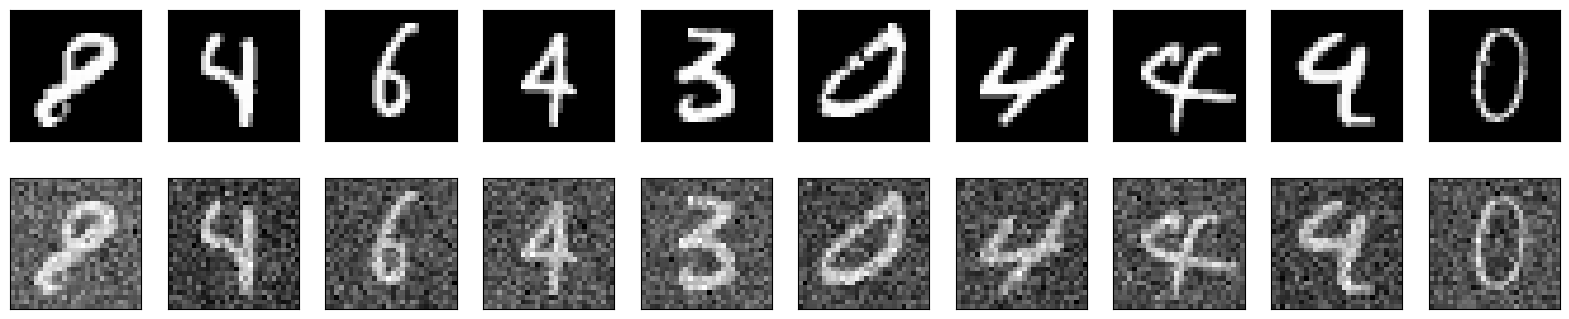

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, y_train), (test_data, y_test) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = apply_gaussian_noise(train_data)
noisy_test_data = apply_gaussian_noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

# Build the autoencoder

We are going to use the Functional API to build our convolutional autoencoder.

In [ ]:
def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [ ]:
# Same as (28,28,1), we neglect the number of instances from shape
IMG_SHAPE = train_data.shape[1:]
encoder, decoder = build_autoencoder(IMG_SHAPE, 28)

inp = Input(IMG_SHAPE)
enco = encoder(inp)
deco = decoder(enco)

autoencoder = Model(inp,deco)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 sequential_41 (Sequential)  (None, 28)                21980     
                                                                 
 sequential_42 (Sequential)  (None, 28, 28, 1)         22736     
                                                                 
Total params: 44716 (174.67 KB)
Trainable params: 44716 (174.67 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),


)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0470 - val_loss: 0.0312
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0266 - val_loss: 0.0227
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0216 - val_loss: 0.0200
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0200 - val_loss: 0.0193
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0194 - val_loss: 0.0189
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0193 - val_loss: 0.0188
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0192 - val_loss: 0.0187
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0192 - val_loss: 0.0187
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0192 - val_loss: 0.0187

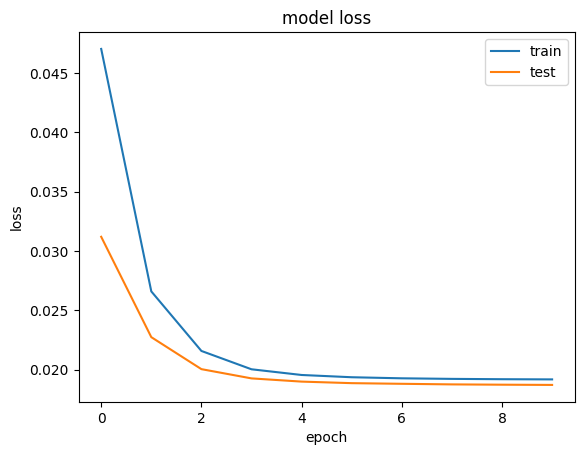

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 48ms/step


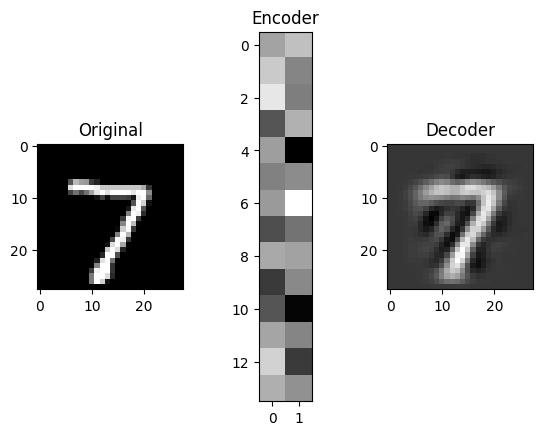

1/1 [==============================] - 0s 15ms/step


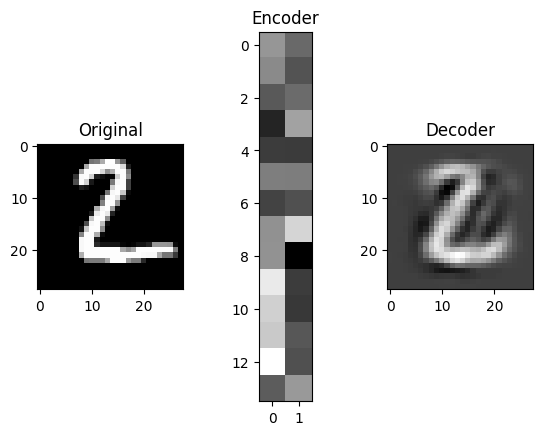

1/1 [==============================] - 0s 17ms/step


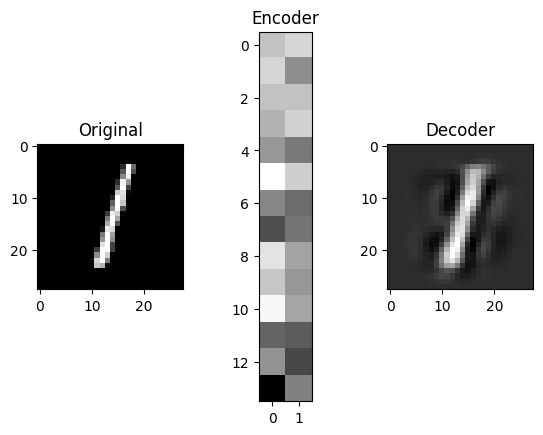

1/1 [==============================] - 0s 15ms/step


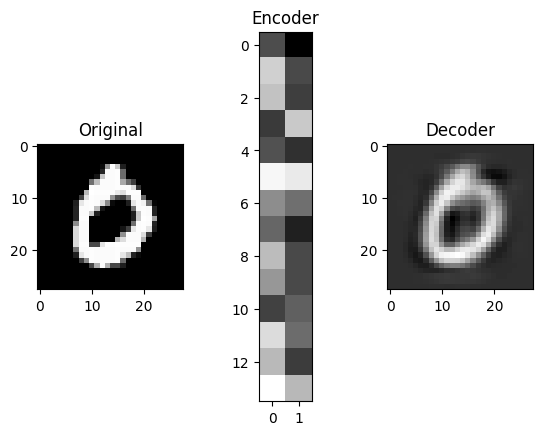

1/1 [==============================] - 0s 15ms/step


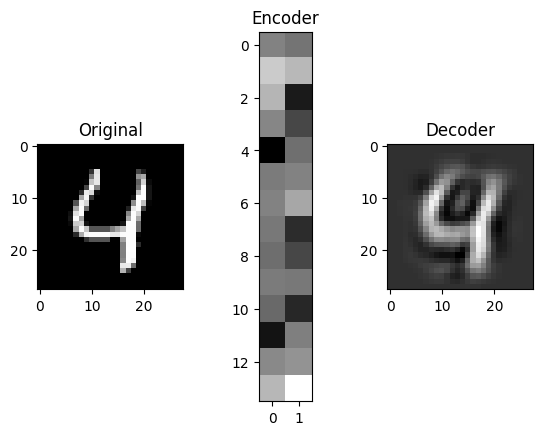

In [ ]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 28, 28, 1) which is the same as the model input
    enco = encoder.predict(img[None])[0]
    deco = decoder.predict(enco[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,3,2)
    plt.title("Encoder")
    plt.imshow(enco.reshape([enco.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Decoder")
    plt.imshow(deco)
    plt.show()

for i in range(5):
    img = test_data[i]
    visualize(img,encoder,decoder)

In [ ]:
# We can use bigger code size for better quality
encoder, decoder = build_autoencoder(IMG_SHAPE, 28)

inp = Input(IMG_SHAPE)
enco = encoder(inp)
deco = decoder(enco)

autoencoder = Model(inp, deco)
autoencoder.compile('adamax', 'mse')

    # We continue to train our model with new noise-augmented data
autoencoder.fit(x=noisy_train_data, y=train_data, epochs=5,
                    validation_data=[noisy_test_data, test_data])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0332 - val_loss: 0.0212
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0209 - val_loss: 0.0202
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0206 - val_loss: 0.0201
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0206 - val_loss: 0.0201


1/1 [==============================] - 0s 41ms/step


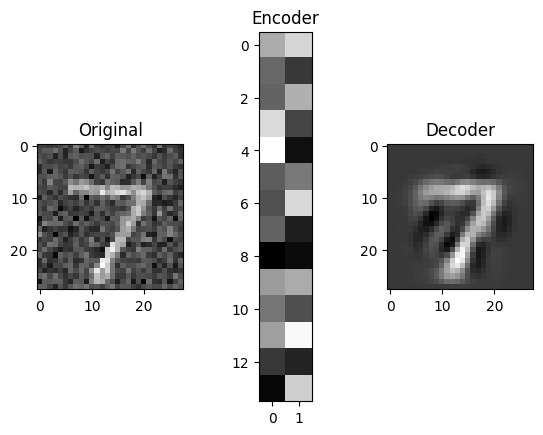

1/1 [==============================] - 0s 16ms/step


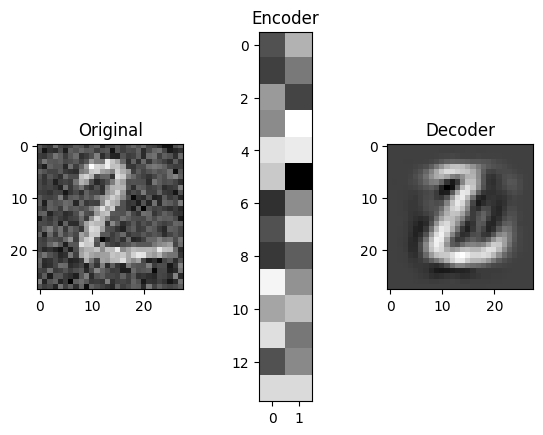

1/1 [==============================] - 0s 17ms/step


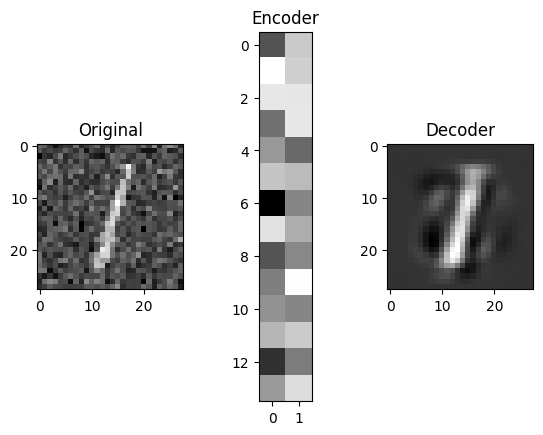

1/1 [==============================] - 0s 16ms/step


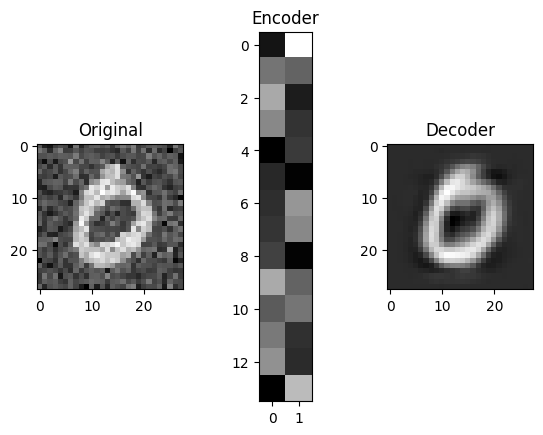

1/1 [==============================] - 0s 17ms/step


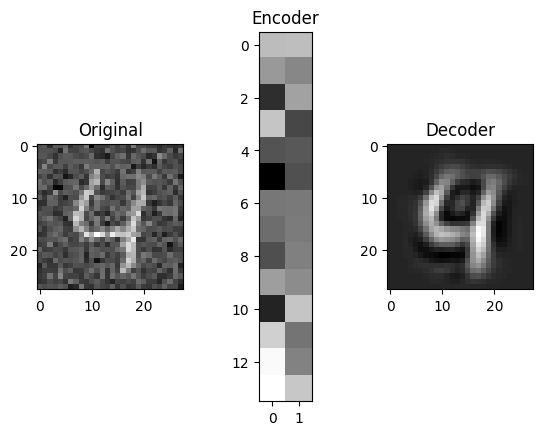

In [ ]:
X_test_noise = apply_gaussian_noise(test_data)
for i in range(5):
    img = X_test_noise[i]
    visualize(img,encoder,decoder)

# **Convolutional autoencoder for image denoising**

#Normalizes the supplied array and reshapes it into the appropriate format.
آرایه ارائه شده را نرمال می کند و آن را به فرمت مناسب تغییر شکل می دهد

In [ ]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    #array = np.reshape(array, (len(array), 28, 28, 1))
    return array


#NAdds random noise to each image in the supplied array
نویز تصادفی را به هر تصویر در آرایه ارائه شده اضافه می کند

In [ ]:
def apply_gaussian_noise(X, sigma=0.2):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

#Displays ten random images from each one of the supplied arrays
ده تصویر تصادفی را از هر یک از آرایه های ارائه شده نمایش می دهد

In [ ]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Prepare the data
#Since we only need images from the dataset to encode and decode, we won't use the labels.
از آنجایی که ما فقط به تصاویر از مجموعه داده برای رمزگذاری و رمزگشایی نیاز داریم، از برچسب ها استفاده نخواهیم کرد.

11490434/11490434 [==============================] - 1s 0us/step


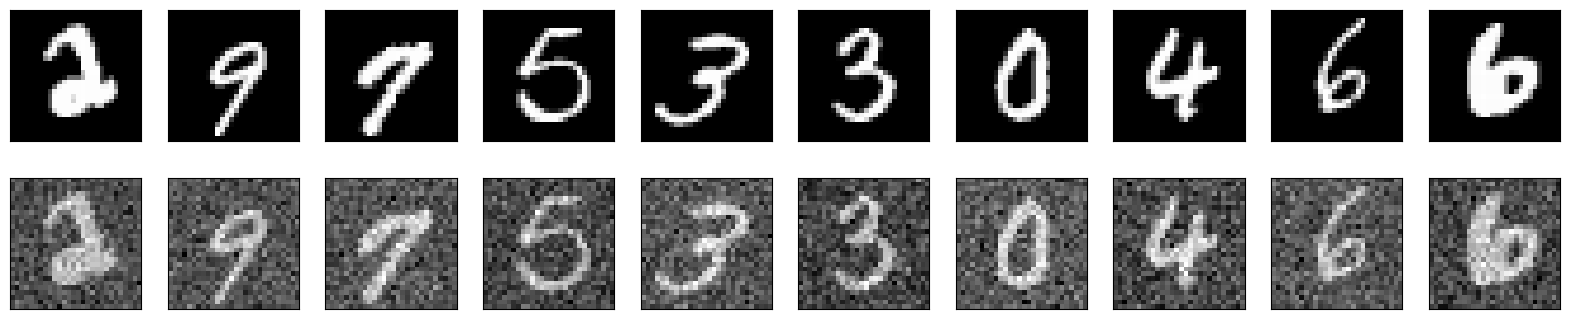

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, y_train), (test_data, y_test) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = apply_gaussian_noise(train_data)
noisy_test_data = apply_gaussian_noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

# Build the Convolutional autoencoder

We are going to use the Functional API to build our convolutional autoencoder.

In [ ]:
def build_autoencoder_CAE(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(Conv2D(32, (3, 3), padding = "same", activation = "relu", input_shape = (28,28,1)))
    encoder.add(MaxPooling2D(pool_size = (2, 2)))
    encoder.add(Conv2D(32, (3, 3), padding = "same", activation = "relu"))
    encoder.add(MaxPooling2D(pool_size = (2, 2)))


    decoder = Sequential()
    decoder.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
    decoder.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
    decoder.add(Conv2D(1, (3, 3), activation="sigmoid", padding="same"))

    return encoder, decoder


In [ ]:
# Same as (28,28,1), we neglect the number of instances from shape

IMG_SHAPE = train_data.shape[1:]
encoder, decoder = build_autoencoder_CAE(IMG_SHAPE, 28)

inp = Input(IMG_SHAPE)
enco = encoder(inp)
deco = decoder(enco)

autoencoder = Model(inp,deco)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential_2 (Sequential)   (None, 7, 7, 32)          9568      
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         18785     
                                                                 
Total params: 28353 (110.75 KB)
Trainable params: 28353 (110.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=2,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),


)

Epoch 1/2
469/469 [==============================] - 131s 275ms/step - loss: 0.0657 - val_loss: 0.0085
Epoch 2/2
469/469 [==============================] - 127s 271ms/step - loss: 0.0061 - val_loss: 0.0045


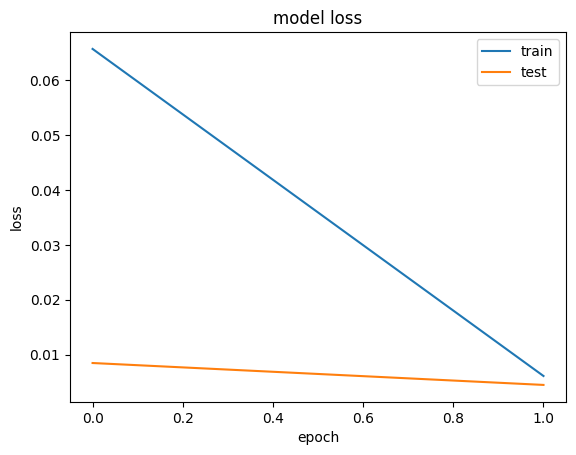

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 124ms/step


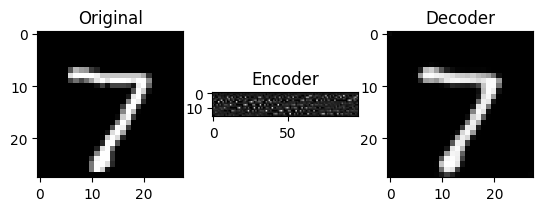

1/1 [==============================] - 0s 32ms/step


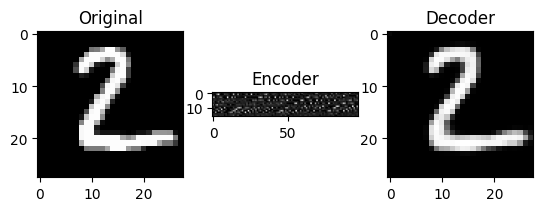

1/1 [==============================] - 0s 30ms/step


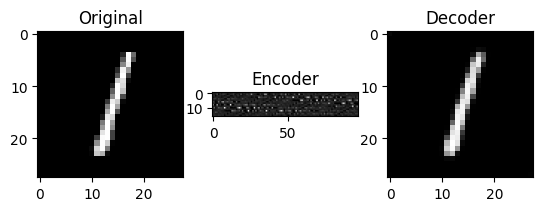

1/1 [==============================] - 0s 21ms/step


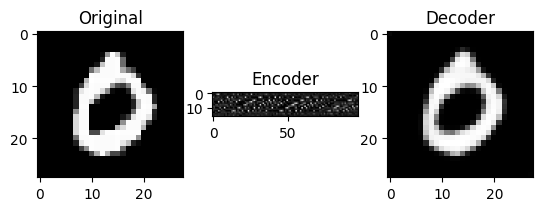

1/1 [==============================] - 0s 23ms/step


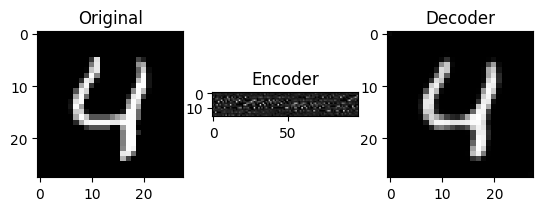

In [ ]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 28, 28, 1) which is the same as the model input
    enco = encoder.predict(img[None])[0]
    deco = decoder.predict(enco[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,3,2)
    plt.title("Encoder")
    plt.imshow(enco.reshape([enco.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Decoder")
    plt.imshow(deco)
    plt.show()

for i in range(5):
    img = test_data[i]
    visualize(img,encoder,decoder)

In [ ]:
# We can use bigger code size for better quality
encoder, decoder = build_autoencoder_CAE(IMG_SHAPE, 28)

inp = Input(IMG_SHAPE)
enco = encoder(inp)
deco = decoder(enco)

autoencoder = Model(inp, deco)
autoencoder.compile('adamax', 'mse')

    # We continue to train our model with new noise-augmented data
autoencoder.fit(x=noisy_train_data, y=train_data, epochs=5,
                    validation_data=[noisy_test_data, test_data])

Epoch 1/5
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0277 - val_loss: 0.0060
Epoch 2/5
1875/1875 [==============================] - 143s 76ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 3/5
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 4/5
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 5/5
1875/1875 [==============================] - 141s 75ms/step - loss: 0.0039 - val_loss: 0.0037


1/1 [==============================] - 0s 40ms/step


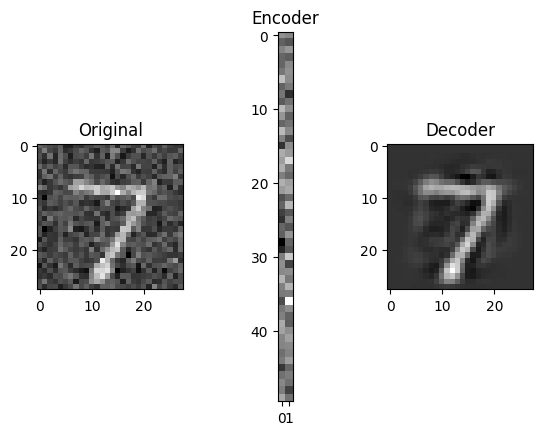

1/1 [==============================] - 0s 17ms/step


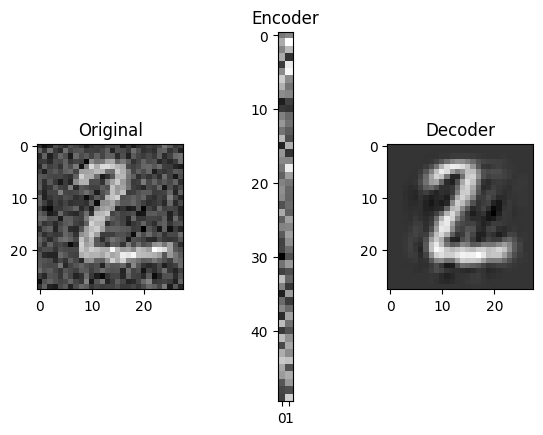

1/1 [==============================] - 0s 17ms/step


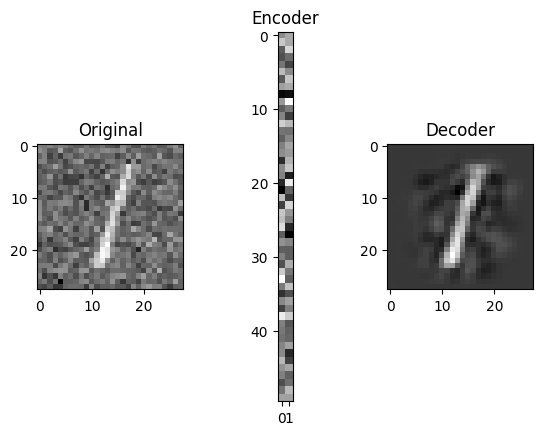

1/1 [==============================] - 0s 16ms/step


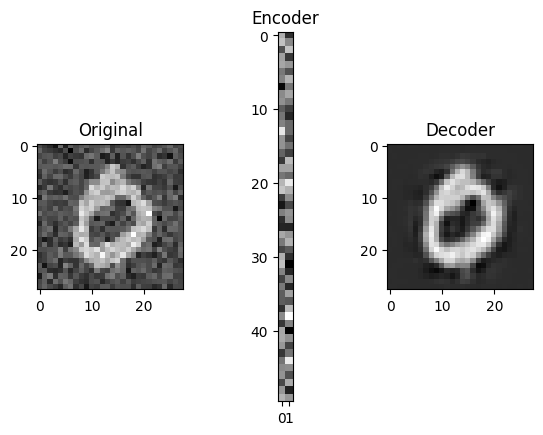

1/1 [==============================] - 0s 20ms/step


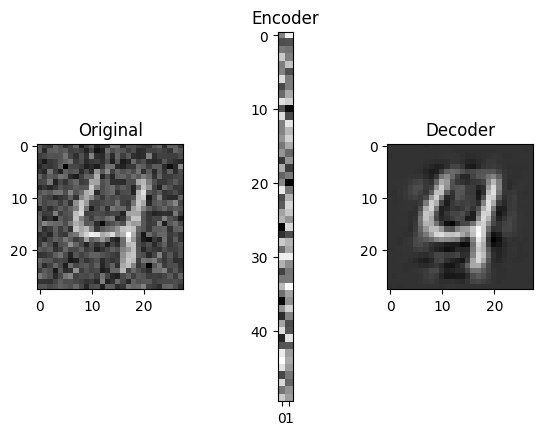

In [ ]:
X_test_noise = apply_gaussian_noise(test_data)
for i in range(5):
    img = X_test_noise[i]
    visualize(img,encoder,decoder)